# ZNEUS 2025 - HOUSES

### Vypracovali: Dobrydnev Nikolai & Šeliga Milan

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Loading Data

In [2]:
df = pd.read_csv("houses.csv")
df

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09
20636,77100.0,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21
20637,92300.0,1.7000,17.0,2254.0,485.0,1007.0,433.0,39.43,-121.22
20638,84700.0,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   median_income       20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   latitude            20640 non-null  float64
 8   longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Features

In [48]:
df.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600,8.3252,41,880,129,322,126,37.88,-122.23
1,358500,8.3014,21,7099,1106,2401,1138,37.86,-122.22
2,352100,7.2574,52,1467,190,496,177,37.85,-122.24
3,341300,5.6431,52,1274,235,558,219,37.85,-122.25
4,342200,3.8462,52,1627,280,565,259,37.85,-122.25


Looking at the table, we can tell that each observation represent some complex of apartments/houses.

`median_income` most problably represented in tens of thousands US dollars. 

`median_house_value` represented just in US dollars.

### Cleaning Data

#### Missing Data

In [5]:
df.isnull().sum()

median_house_value    0
median_income         0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
latitude              0
longitude             0
dtype: int64

Dataset has no missing values at all

#### Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

Dataset has no duplicates either

#### Data Types

In [10]:
df.dtypes

median_house_value    float64
median_income         float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
latitude              float64
longitude             float64
dtype: object

Types are correct, although `total_rooms`, `total_bedrooms` do not require float type

In [37]:
(df["total_rooms"] % 1 == 0).all() # all values of total rooms are integers

np.True_

In [18]:
df["total_rooms"] = df["total_rooms"].astype("int")

In [36]:
(df["total_bedrooms"] % 1 == 0).all() # all values of total bedrooms are integers

np.True_

In [21]:
df["total_bedrooms"] = df["total_bedrooms"].astype("int")

In [35]:
(df["households"] % 1 == 0).all() # all values of households are integers

np.True_

In [24]:
df["households"] = df["households"].astype("int")

In [38]:
(df["population"] % 1 == 0).all() # all values of population are integers

np.True_

In [39]:
df["population"] = df["population"].astype("int")

In [42]:
(df["median_house_value"] % 1 == 0).all() # all values of median_house_value are integers

np.True_

In [43]:
df["median_house_value"] = df["median_house_value"].astype("int")

In [44]:
(df["housing_median_age"] % 1 == 0).all() # all values of median_house_value are integers

np.True_

In [45]:
df["housing_median_age"] = df["housing_median_age"].astype("int")

In [46]:
df.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600,8.3252,41,880,129,322,126,37.88,-122.23
1,358500,8.3014,21,7099,1106,2401,1138,37.86,-122.22
2,352100,7.2574,52,1467,190,496,177,37.85,-122.24
3,341300,5.6431,52,1274,235,558,219,37.85,-122.25
4,342200,3.8462,52,1627,280,565,259,37.85,-122.25


In [47]:
df.dtypes

median_house_value      int64
median_income         float64
housing_median_age      int64
total_rooms             int64
total_bedrooms          int64
population              int64
households              int64
latitude              float64
longitude             float64
dtype: object

#### Outliers

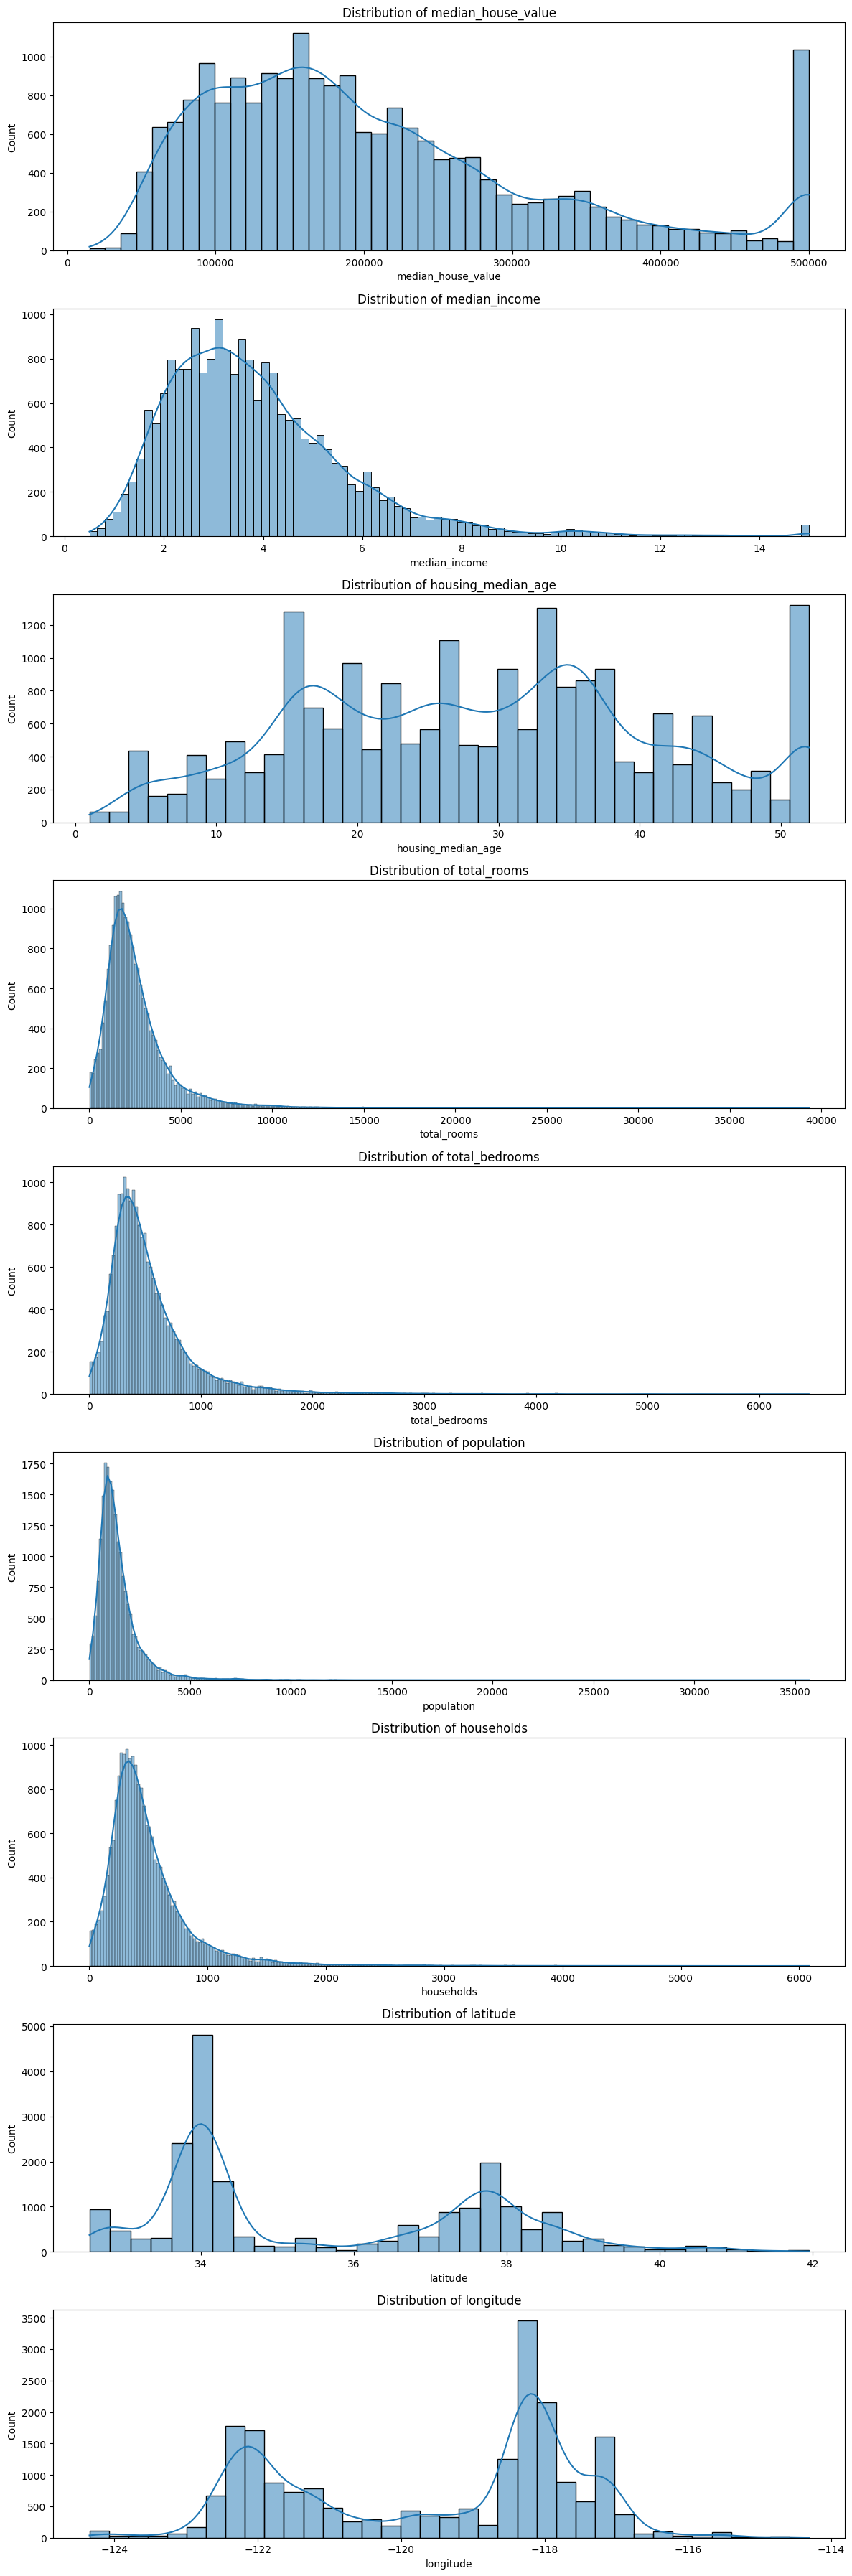

In [58]:
cols = len(df.columns)
plt.figure(figsize=(12, 4 * cols))

for i, col in enumerate(df.columns, 1):
    plt.subplot(cols, 1, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()